# Color Detection

### Goal
Remove background color of the container. 

### Methodology
* Create a boolean mask that detects color coordinates in a range.
* Apply the mask to the image.

In [14]:
# All imports go here
import cv2
import numpy as np
import os  
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline

# Globals
IMG_PATH = 'photos/' 
IMG_NAMES = os.listdir(IMG_PATH)

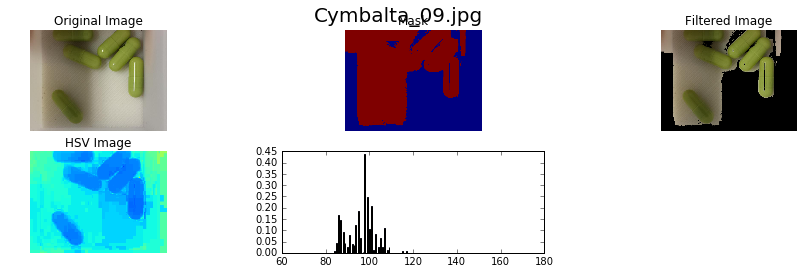

In [50]:
def apply_color_filer(img_path, hue_low, hue_high, sat_low, sat_high, val_low, val_high):
    '''Filter an image by color'''
    img = cv2.imread(img_path)

    # convert BGR to RGB and then to HSV
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2HSV)

    # define range in HSV
    lower = np.array([hue_low, sat_low, val_low])
    upper = np.array([hue_high, sat_high, sat_high])

    # threshold the HSV image to get only colors in range
    mask = cv2.inRange(hsv, lower, upper)

    # bitwise-AND mask and original image
    res = cv2.bitwise_and(rgb_img, rgb_img, mask= mask)
    return rgb_img, mask, res, hsv

def get_random_images(num):
    '''Get num random images from the dataset'''
    return np.random.choice(os.listdir(IMG_PATH), num)

def plot_image(index=0, hue_low=110, hue_high=130, sat_low=50, sat_high=255, val_low=50, val_high=255):
    '''Plot the original image, its mask, and the filtered image '''
    path = IMG_PATH + IMG_NAMES[index]
    img, mask, res, hsv = apply_color_filer(path, hue_low, hue_high, sat_low, sat_high, val_low, val_high)
    fig = plt.figure(figsize=(16,4))
    fig.suptitle(IMG_NAMES[index], fontsize=20)
    plt.subplot(231), plt.imshow(img), plt.title('Original Image'), plt.axis('off')
    plt.subplot(232), plt.imshow(mask), plt.title('Mask'), plt.axis('off')
    plt.subplot(233), plt.imshow(res), plt.title('Filtered Image'), plt.axis('off')
    plt.subplot(234), plt.imshow(hsv[:,:,0]), plt.title('HSV Image'), plt.axis('off')
    plt.subplot(235), plt.hist(hsv[:,:,0].flatten(), bins=256, normed=True)
    plt.show()  
    
interact(plot_image, index=(0, len(IMG_NAMES) - 1), 
         hue_low=(0,255), hue_high=(0,255), 
         sat_low=(0,255), sat_high=(0,255), 
         val_low=(0,255), val_high=(0,255));

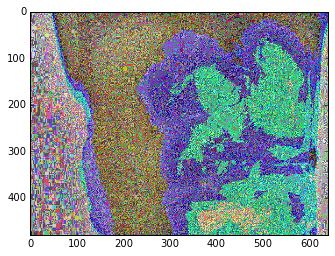

In [62]:
indices = range(1,10)
images = [cv2.imread('photos/Atripla_0'+ str(i) +'.jpg') for i in indices]
images.append(cv2.imread('photos/Atripla_10.jpg'))
background = np.empty(images[0].shape)
wt, ht, colors = background.shape
for c in xrange(colors):
    for i in xrange(wt):
        for j in xrange(ht):
            vals = np.array([im[i,j,c] for im in images])
            median = np.median(vals)
            background[i,j,c] = median
plt.imshow(background)